In [22]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [109]:
wine=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
wine.isnull().sum().sum()

0

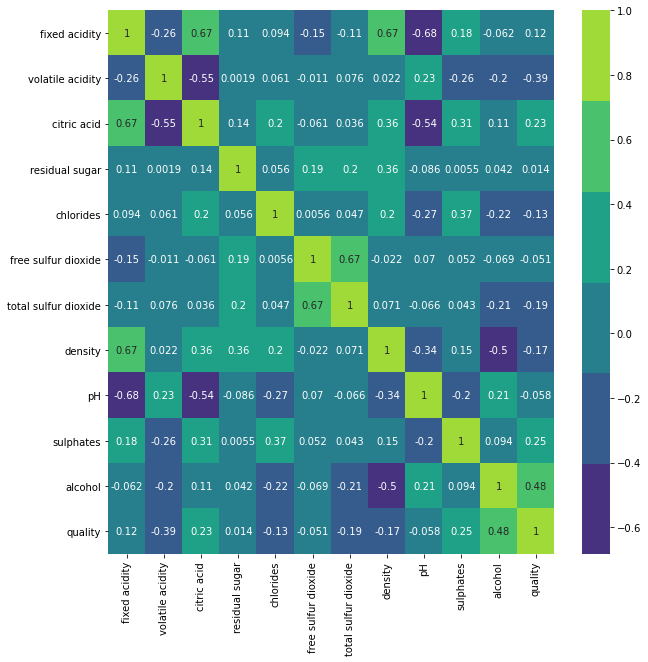

In [64]:
# heat map of cor-relation
plt.figure(figsize=(10, 10))
colormap=sns.color_palette("viridis")

sns.heatmap(wine.corr() ,cmap=colormap ,annot = True)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

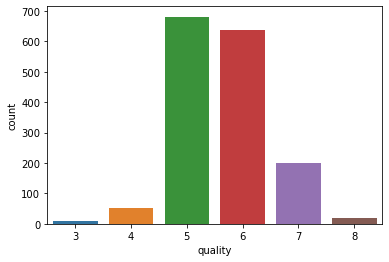

In [65]:
sns.countplot(x='quality',data=wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

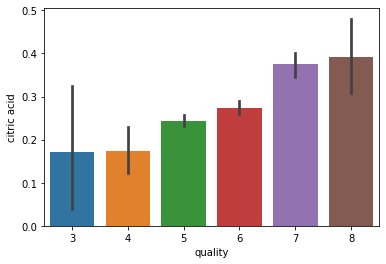

In [66]:
sns.barplot(x='quality',y='citric acid',data=wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

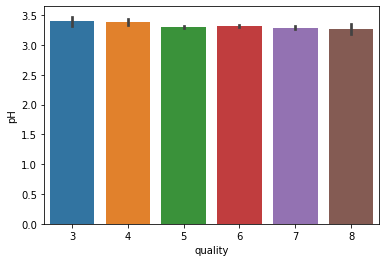

In [67]:
sns.barplot(x='quality',y='pH',data=wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

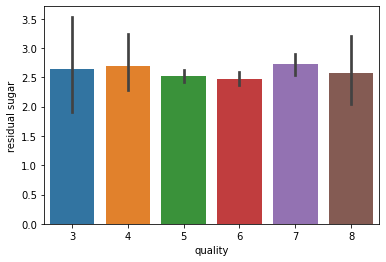

In [68]:
sns.barplot(x='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

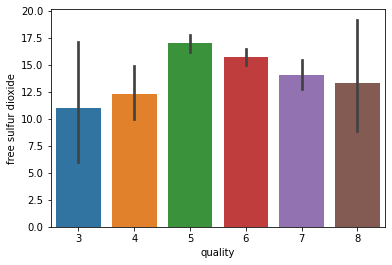

In [69]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

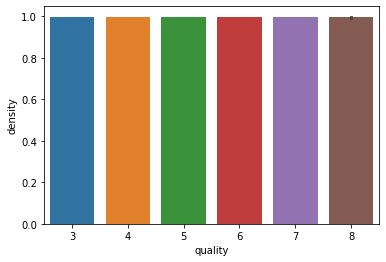

In [70]:
sns.barplot(x='quality',y='density',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

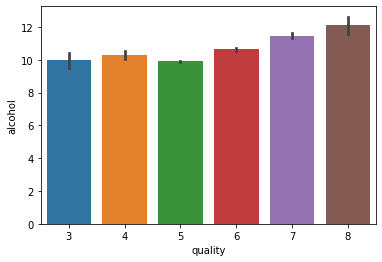

In [71]:
sns.barplot(x='quality',y='alcohol',data=wine)

In [110]:
mylist_good=np.where(wine.quality>=7)
mylist_poor=np.where(wine.quality<=6)

for item in mylist_good:
    wine['quality'][item]= "Good" 
for item in mylist_poor:
    wine['quality'][item]= "Poor" 

In [111]:
wine['quality'].unique()

array(['Poor', 'Good'], dtype=object)

In [112]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
wine['quality']=LE.fit_transform(wine['quality'])

In [113]:
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=wine.drop('quality',axis=1)
y=wine['quality']
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=i)
    SC=StandardScaler()
    x_train = SC.fit_transform(x_train)
    x_test = SC.fit_transform(x_test)
    model=LinearRegression()
    model.fit(x_train,y_train)
    pred= model.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print("R-square",maxAcc,'Random state',i)

R-square 0.06311302326282575 Random state 0
R-square 0.08387318977137237 Random state 1
R-square 0.2241037818298267 Random state 2
R-square 0.24492230743858256 Random state 3
R-square 0.2739693486505522 Random state 4
R-square 0.3045100614401909 Random state 10
R-square 0.321702335892028 Random state 78


In [114]:
## we have best random state at 133
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                  random_state=78)

In [118]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

In [119]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,classification_report
accuracy_score(y_test,predictions)

0.85625

In [120]:
f1_score(y_test,predictions) 

0.9204152249134949

In [121]:
confusion_matrix(y_test,predictions)

array([[  8,  42],
       [  4, 266]], dtype=int64)

In [134]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

knn=KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, scoring='accuracy',cv=5,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [135]:
print(grid_search.best_params_)

{'n_neighbors': 26}


In [136]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 87.10%


In [137]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred) 

0.846875

In [138]:
confusion_matrix(y_test,pred)

array([[ 13,  37],
       [ 12, 258]], dtype=int64)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
RFC= RandomForestClassifier(n_estimators=200)
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is {:.2f}% '.format(accuracy*100))

accuracy of the model is 92.19% 


In [140]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
 
# Parameters to try
Parameter_Trials={'n_estimators':[100,200,300,500,1000],
                  'criterion':['gini','entropy'],
                  'max_depth': [2,3]}
 
Grid_Search = GridSearchCV(RF, Parameter_Trials, cv=5, n_jobs=1, verbose=5)
GridSearchResults=Grid_Search.fit(x,y)
print(GridSearchResults.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.4s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.4s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.4s
[CV 4/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.3s
[CV 5/5] END ..criterion=gini, max_depth=2, n_estimators=100; total time=   0.4s
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.6s
[CV 2/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.6s
[CV 3/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.9s
[CV 4/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.9s
[CV 5/5] END ..criterion=gini, max_depth=2, n_estimators=200; total time=   0.7s
[CV 1/5] END ..criterion=gini, max_depth=2, n_estimators=300; total time=   1.3s
[CV 2/5] END ..criterion=gini, max_depth=2, n_e

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 300}


In [142]:
accuracy = GridSearchResults.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 87.62%


In [143]:
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
accuracy_score(y_test,pred) 

0.925

In [144]:
confusion_matrix(y_test,pred)

array([[ 27,  23],
       [  1, 269]], dtype=int64)

In [145]:
%%time
import pickle
# # saved the trained model in file with given name
pickle_out = open("wine.pickle","wb") # name of my pickle file , wb -write
pickle.dump(RF, pickle_out)
pickle_out.close()

Wall time: 16 ms


In [147]:
# loading the pickeled model
pickle_in = open("wine.pickle","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
trained_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,